In [4]:
import os
from pathlib import Path

local_root_directory = '/Users/stefanduprey/Documents/My_Data/My_TitanicData/'
path = Path(local_root_directory)

if path.exists():
    raise Exception('already downloaded')
    
import zipfile,kaggle
kaggle.api.competition_download_cli(str(path))
zipfile.ZipFile(f'{path}.zip').extractall(path)
    

Exception: already downloaded

In [286]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [287]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [288]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [289]:
modes = df.mode().iloc[0]
modes

PassengerId                              892
Survived                                 0.0
Pclass                                   3.0
Name           Abbott, Master. Eugene Joseph
Sex                                     male
Age                                     21.0
SibSp                                    0.0
Parch                                    0.0
Ticket                              PC 17608
Fare                                    7.75
Cabin                        B57 B59 B63 B66
Embarked                                   S
Name: 0, dtype: object

In [290]:
df.fillna(modes, inplace=True)

In [291]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [292]:
import numpy as np

df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,28.364833,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,13.180116,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


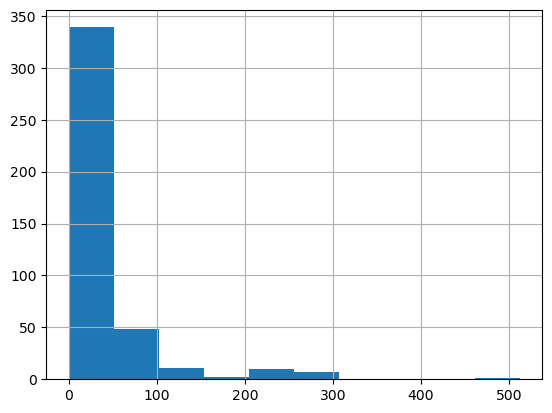

In [293]:
df['Fare'].hist();

In [294]:
df['LogFare'] = np.log(df['Fare']+1)

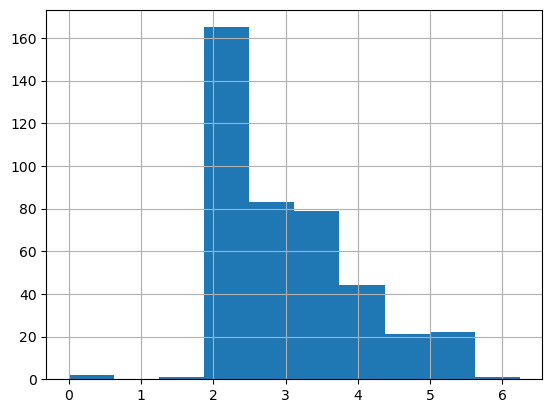

In [295]:
df['LogFare'].hist();

In [296]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [297]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,418,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,330,270


In [298]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [299]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,True,False,False,False,True,False,True,False
1,False,True,False,False,True,False,False,True
2,True,False,False,True,False,False,True,False
3,True,False,False,False,True,False,False,True
4,False,True,False,False,True,False,False,True


In [300]:
from torch import tensor
t_dep = tensor(df.Survived)

In [301]:
t_dep.shape

torch.Size([418])

In [302]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols
temp_nd_array = df[indep_cols].values
temp_nd_array=temp_nd_array.astype(float)

In [303]:
t_indep = tensor(temp_nd_array, dtype=torch.float)
t_indep

tensor([[34.5000,  0.0000,  0.0000,  2.1781,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [47.0000,  1.0000,  0.0000,  2.0794,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [62.0000,  0.0000,  0.0000,  2.3691,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [27.0000,  0.0000,  0.0000,  2.2683,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [22.0000,  1.0000,  1.0000,  2.5868,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [14.0000,  0.0000,  0.0000,  2.3248,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [30.0000,  0.0000,  0.0000,  2.1552,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        ...,
        [37.0000,  1.0000,  0.0000,  4.5109,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [28.0000,  0.0000,  0.0000,  2.1719

In [304]:
t_indep.shape

torch.Size([418, 12])

In [305]:
torch.manual_seed(452)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff,dtype=torch.float)-0.5
coeffs

tensor([ 0.4257, -0.4608, -0.2451,  0.1313, -0.1797, -0.4754, -0.2806, -0.4989,  0.3610,  0.1406,  0.1596,  0.2663])

In [306]:
coeffs.shape

torch.Size([12])

In [307]:
t_indep*coeffs

tensor([[14.6882, -0.0000, -0.0000,  0.2860, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.1596,  0.0000],
        [20.0100, -0.4608, -0.0000,  0.2731, -0.0000, -0.4754, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [26.3961, -0.0000, -0.0000,  0.3111, -0.1797, -0.0000, -0.0000, -0.4989,  0.0000,  0.0000,  0.1596,  0.0000],
        [11.4951, -0.0000, -0.0000,  0.2979, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 9.3664, -0.4608, -0.2451,  0.3397, -0.0000, -0.4754, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 5.9604, -0.0000, -0.0000,  0.3053, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [12.7723, -0.0000, -0.0000,  0.2830, -0.0000, -0.4754, -0.0000, -0.0000,  0.3610,  0.0000,  0.1596,  0.0000],
        ...,
        [15.7525, -0.4608, -0.0000,  0.5924, -0.0000, -0.4754, -0.2806, -0.0000,  0.0000,  0.0000,  0.1596,  0.0000],
        [11.9208, -0.0000, -0.0000,  0.2852

In [308]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [309]:
t_indep*coeffs

tensor([[ 0.1933, -0.0000, -0.0000,  0.0458, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.1596,  0.0000],
        [ 0.2633, -0.0576, -0.0000,  0.0438, -0.0000, -0.4754, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 0.3473, -0.0000, -0.0000,  0.0499, -0.1797, -0.0000, -0.0000, -0.4989,  0.0000,  0.0000,  0.1596,  0.0000],
        [ 0.1513, -0.0000, -0.0000,  0.0477, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 0.1232, -0.0576, -0.0272,  0.0544, -0.0000, -0.4754, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 0.0784, -0.0000, -0.0000,  0.0489, -0.1797, -0.0000, -0.0000, -0.0000,  0.3610,  0.0000,  0.0000,  0.2663],
        [ 0.1681, -0.0000, -0.0000,  0.0453, -0.0000, -0.4754, -0.0000, -0.0000,  0.3610,  0.0000,  0.1596,  0.0000],
        ...,
        [ 0.2073, -0.0576, -0.0000,  0.0949, -0.0000, -0.4754, -0.2806, -0.0000,  0.0000,  0.0000,  0.1596,  0.0000],
        [ 0.1569, -0.0000, -0.0000,  0.0457

In [310]:
preds = (t_indep*coeffs).sum(axis=1)

In [311]:
preds[:10]

tensor([ 0.5800,  0.4013, -0.1218,  0.6465,  0.2447,  0.5749,  0.2586, -0.2800,  0.1714,  0.5178])

In [312]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.6388)

In [313]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [314]:
coeffs.requires_grad_()

tensor([ 0.4257, -0.4608, -0.2451,  0.1313, -0.1797, -0.4754, -0.2806, -0.4989,  0.3610,  0.1406,  0.1596,  0.2663], requires_grad=True)

In [315]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.6388, grad_fn=<MeanBackward0>)

In [316]:
loss.backward()

In [317]:
coeffs.grad

tensor([-0.0663, -0.0141, -0.0149, -0.1184,  0.2153, -0.3636, -0.1029, -0.2225,  0.1770, -0.0622, -0.0239, -0.0622])

In [318]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.1327, -0.0281, -0.0298, -0.2368,  0.4306, -0.7273, -0.2057, -0.4450,  0.3541, -0.1244, -0.0478, -0.1244])

In [319]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5499)


In [320]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [321]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(335, 83)

In [322]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")
def init_coeffs(): return (torch.rand(n_coeff, dtype=torch.float)-0.5).requires_grad_()

In [323]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [324]:
coeffs = train_model(18, lr=0.2)

0.566; 0.503; 0.446; 0.391; 0.336; 0.282; 0.229; 0.177; 0.135; 0.111; 0.141; 0.139; 0.159; 0.180; 0.151; 0.188; 0.157; 0.190; 

In [325]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.1983),
 'SibSp': tensor(0.1526),
 'Parch': tensor(0.2522),
 'LogFare': tensor(0.0456),
 'Sex_male': tensor(-0.5021),
 'Sex_female': tensor(0.4160),
 'Pclass_1': tensor(0.6285),
 'Pclass_2': tensor(0.4652),
 'Pclass_3': tensor(0.4793),
 'Embarked_C': tensor(0.1113),
 'Embarked_Q': tensor(0.2819),
 'Embarked_S': tensor(0.2324)}

In [326]:
preds = calc_preds(coeffs, val_indep)

In [327]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True])

In [328]:
results.shape

torch.Size([83])

In [329]:
results.float().mean()

tensor(1.)

In [330]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(1.)

In [331]:
preds[:28]

tensor([1.0680, 0.1596, 0.1500, 0.1186, 1.0874, 0.0947, 1.2154, 1.2089, 0.2202, 0.2075, 0.2957, 1.0553, 0.0484, 1.2476, 0.2848, 0.2202,
        1.0492, 1.1932, 0.1119, 0.1340, 0.1844, 0.1783, 1.1179, 0.1482, 0.2970, 0.2629, 1.1989, 1.2782])

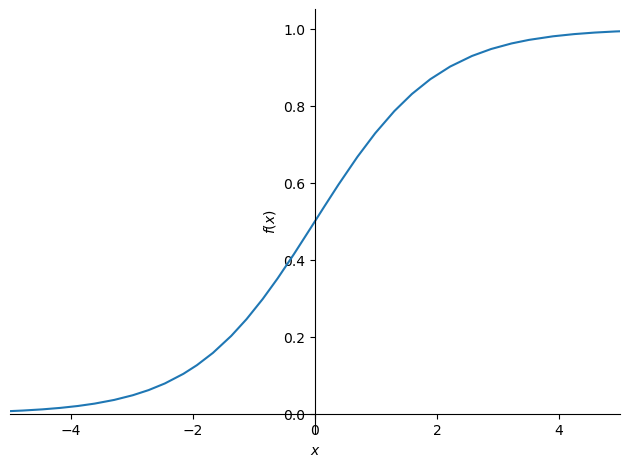

In [332]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [333]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [334]:
coeffs = train_model(lr=100)

0.502; 0.185; 0.001; 0.001; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 

In [335]:
acc(coeffs)

tensor(1.)

In [336]:
show_coeffs()

{'Age': tensor(-1.4470),
 'SibSp': tensor(0.2210),
 'Parch': tensor(0.5609),
 'LogFare': tensor(-0.5129),
 'Sex_male': tensor(-15.9252),
 'Sex_female': tensor(12.5228),
 'Pclass_1': tensor(1.3758),
 'Pclass_2': tensor(-0.7391),
 'Pclass_3': tensor(-2.3801),
 'Embarked_C': tensor(-1.1651),
 'Embarked_Q': tensor(0.9071),
 'Embarked_S': tensor(-2.4328)}

In [337]:
tst_df = pd.read_csv(path/'train.csv')
tst_df['Fare'] = tst_df.Fare.fillna(0)
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values.astype(float), dtype=torch.float)
tst_indep = tst_indep / vals
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [338]:
!head sub.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [339]:
(val_indep*coeffs).sum(axis=1)

tensor([  6.9779, -21.5308, -19.9877, -21.6979,  11.7616, -20.0715,  10.1646,   7.2902, -17.9762, -21.4874, -18.3132,   8.5066, -20.0352,
         10.7794, -20.8445, -17.9762,   6.6576,   7.5447, -20.0916, -20.1076, -21.4709, -19.6769,   7.1425, -19.7739, -17.8830, -18.1289,
         10.2532,  10.8228, -18.0919, -16.8848,   7.6065, -21.3114, -21.3380, -21.1876, -17.9762,  10.4435, -20.8838,  11.6048, -16.9465,
         12.0578,   9.6865, -18.2644, -21.3094,   7.1997,  10.2040, -18.0464, -17.0465,   7.4643, -21.4386, -21.3143,  11.4493, -19.8091,
        -21.5501, -21.4701,  11.8613, -20.9615, -17.7749,   8.3804, -18.0285,  10.4473, -19.9959, -19.9262, -21.8877, -17.6242,   8.4617,
        -17.6529, -21.3474,   8.5778,  11.2753, -16.7812, -18.1665, -19.7941,   8.2632,  10.0723,   8.8265,  10.4718,  10.6820, -18.3525,
          8.6717, -17.7939, -21.4463,   8.6622, -21.4073])

In [340]:
val_indep

tensor([[0.3816, 0.0000, 0.0000, 0.3507, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.3684, 0.0000, 0.0000, 0.5060, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4474, 0.1250, 0.0000, 0.5281, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.5395, 0.0000, 0.0000, 0.3494, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4737, 0.0000, 0.0000, 0.5587, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.2763, 0.2500, 0.0000, 0.5002, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        [0.7105, 0.1250, 0.1111, 0.7078, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.2763, 0.0000, 0.4444, 0.5249, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.2763, 0.0000, 0.0000, 0.3476, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.4079, 0.3750, 0.0000, 0.4718, 1.000

In [274]:
coeffs

tensor([ -1.4470,   0.2210,   0.5609,  -0.5129, -15.9252,  12.5228,   1.3758,  -0.7391,  -2.3801,  -1.1651,   0.9071,  -2.4328])

In [341]:
val_indep@coeffs

tensor([  6.9779, -21.5308, -19.9877, -21.6979,  11.7616, -20.0715,  10.1646,   7.2902, -17.9762, -21.4874, -18.3133,   8.5066, -20.0352,
         10.7794, -20.8445, -17.9762,   6.6576,   7.5447, -20.0916, -20.1076, -21.4709, -19.6769,   7.1425, -19.7739, -17.8830, -18.1289,
         10.2532,  10.8228, -18.0919, -16.8848,   7.6065, -21.3114, -21.3380, -21.1876, -17.9762,  10.4435, -20.8838,  11.6048, -16.9465,
         12.0578,   9.6865, -18.2644, -21.3094,   7.1997,  10.2040, -18.0464, -17.0465,   7.4643, -21.4386, -21.3143,  11.4493, -19.8091,
        -21.5501, -21.4701,  11.8613, -20.9615, -17.7749,   8.3804, -18.0285,  10.4473, -19.9959, -19.9262, -21.8877, -17.6242,   8.4617,
        -17.6529, -21.3474,   8.5778,  11.2753, -16.7812, -18.1665, -19.7941,   8.2632,  10.0723,   8.8265,  10.4718,  10.6820, -18.3525,
          8.6717, -17.7939, -21.4463,   8.6622, -21.4073])

In [342]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [343]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [344]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [345]:
coeffs = train_model(lr=100)

0.514; 0.173; 0.001; 0.001; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 

In [346]:
acc(coeffs)

tensor(1.)

In [347]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [348]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [349]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [350]:
coeffs = train_model(lr=1.4)

0.552; 0.532; 0.504; 0.472; 0.418; 0.351; 0.271; 0.192; 0.133; 0.093; 0.068; 0.052; 0.041; 0.033; 0.028; 0.024; 0.020; 0.018; 0.016; 0.014; 0.013; 0.012; 0.011; 0.010; 0.009; 0.009; 0.008; 0.007; 0.007; 0.007; 

In [351]:
coeffs = train_model(lr=20)

0.552; 0.284; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 

In [352]:
acc(coeffs)

tensor(1.)

In [353]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [354]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [355]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [356]:
coeffs = train_model(lr=4)

0.540; 0.475; 0.342; 0.282; 0.351; 0.339; 0.202; 0.013; 0.001; 0.001; 0.001; 0.001; 0.001; 0.001; 0.001; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 0.000; 

In [357]:
acc(coeffs)

tensor(1.)